In [1]:
import os
if not os.getcwd().endswith('mob2crime'):
    os.chdir('..')
os.getcwd()

'/home/Jiahui/mob2crime'

In [2]:
import gzip, json, glob
import logging

import pandas as pd
from collections import defaultdict
import json

from src.creds import mex_root, mex_tower_08, mex_tower_12

In [3]:

voz_or_vozentrante = 'VOZ'
debugging = False
tower_info_version = '08'

# level = logging.DEBUG if debugging else logging.INFO
# logging.basicConfig(filename="logs/MexTwHrUniqCnt.log", level=level, format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

stat_dir = 'stats/MexTw%sHrUniqCnt%s/' % (tower_info_version, voz_or_vozentrante)  
if debugging:
#     mex_root = 'tmp/'
    stat_dir += 'debug/'
os.makedirs(stat_dir, exist_ok=True)

# logging.info('===============================')
# logging.info('MEX tower hourly unique user counting starts. debugging=%s, %s, tower version=%s' % (debugging, voz_or_vozentrante, tower_info_version))


In [4]:
fns = list(glob.glob(stat_dir+'*.csv'))
fns = sorted(fns)

In [5]:
dates = sorted(set([fn.replace(stat_dir, '')[:10] for fn in fns]))
dates.remove('2010-02-01')
dates.remove('2010-07-01')

In [6]:
pcnt_per_date = {}
for d in dates:
    df_located = pd.read_csv(stat_dir+d+'-located.csv',index_col=0)
    df_no_info = pd.read_csv(stat_dir+d+'-no-info.csv',index_col=0)
    pcnt_per_date[d] = (df_no_info.fillna(0)/df_located.append(df_no_info).fillna(0).sum()).sum()

In [7]:
res = pd.DataFrame(pcnt_per_date)

res.index = res.index.astype(int)

res.sort_index(inplace=True)

In [8]:
%matplotlib inline

the percentage increases over time


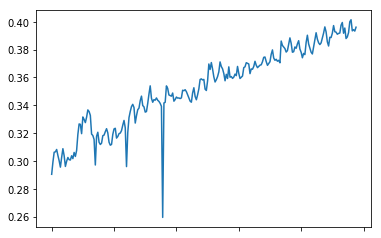

In [9]:
res.mean().plot()
print('the percentage increases over time')

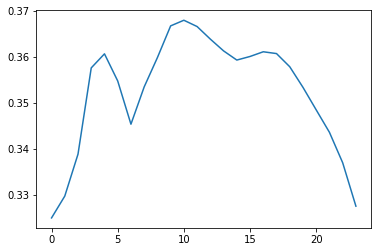

In [10]:
res.mean(axis=1).plot()